In [44]:
import pyodbc 

In [45]:
con = pyodbc.connect('Driver={SQL Server};'
                     'Server=DESKTOP-ST9D189\JAYDEEP_PATEL;'
                     'Database=Flight_Booking;'
                     'Trusted_Connection=yes'
                     "uid=sa;pwd=1234")

In [46]:
import pandas as pd
df = pd.read_sql_query("select * from Flight_Booking",con)

c:\Users\HP\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [47]:
df

,column1,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [48]:
df=df.drop(columns=["column1"])

In [49]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [50]:
df.shape # Dataframe contains around 3 lakhs records with 11 features

(300153, 11)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  object 
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 25.2+ MB


In [52]:
df.describe()

,duration,price
count,300153.000000,300153.000000
mean,12.221021,20889.660523
std,7.191997,22697.767366
min,0.830000,1105.000000
25%,6.830000,4783.000000
50%,11.250000,7425.000000
75%,16.170000,42521.000000
max,49.830000,123071.000000


In [53]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [54]:
# dealing with null values-
# droping
# REplacing -
#          object - mode
#          numerical -median/ mean

In [55]:
df.duplicated().sum()

0

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

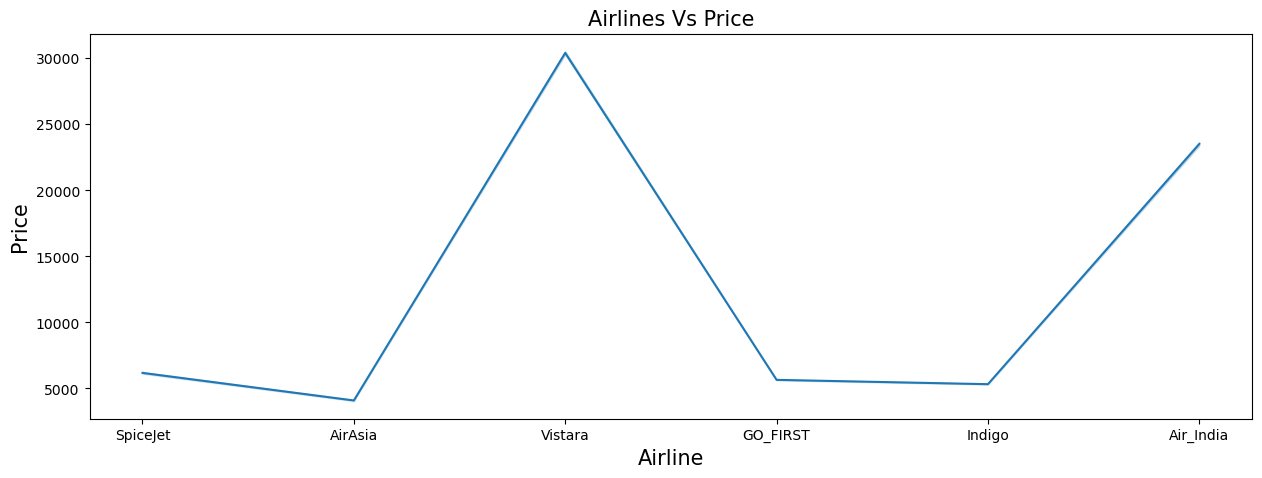

In [57]:
#1) Plot the best suitable graph if the price varies with different airlines
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

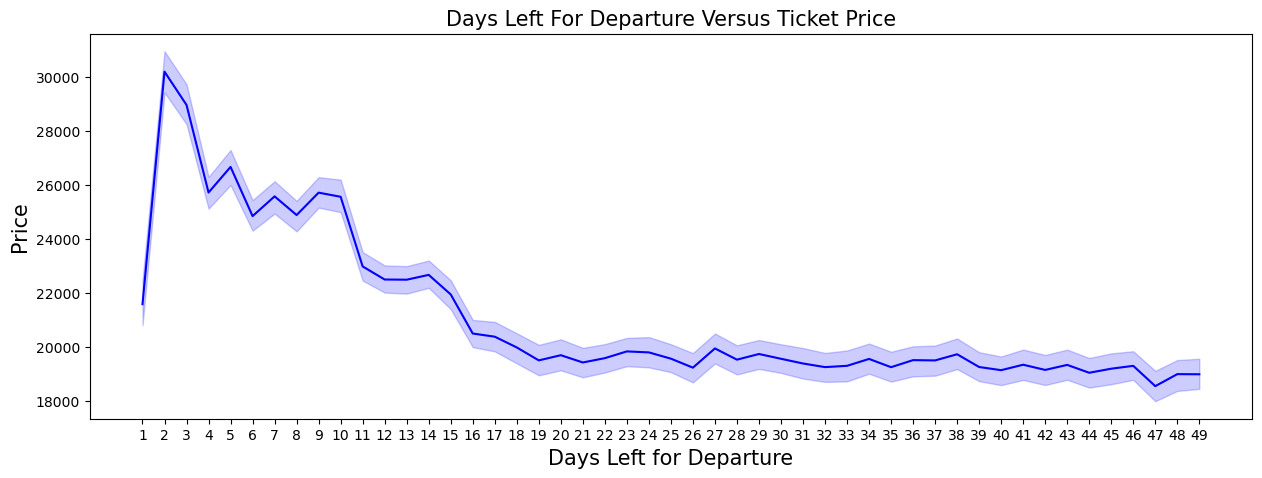

In [58]:
#2) Is the price affected when tickets are bought just 1 or 2 days before departure?

plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

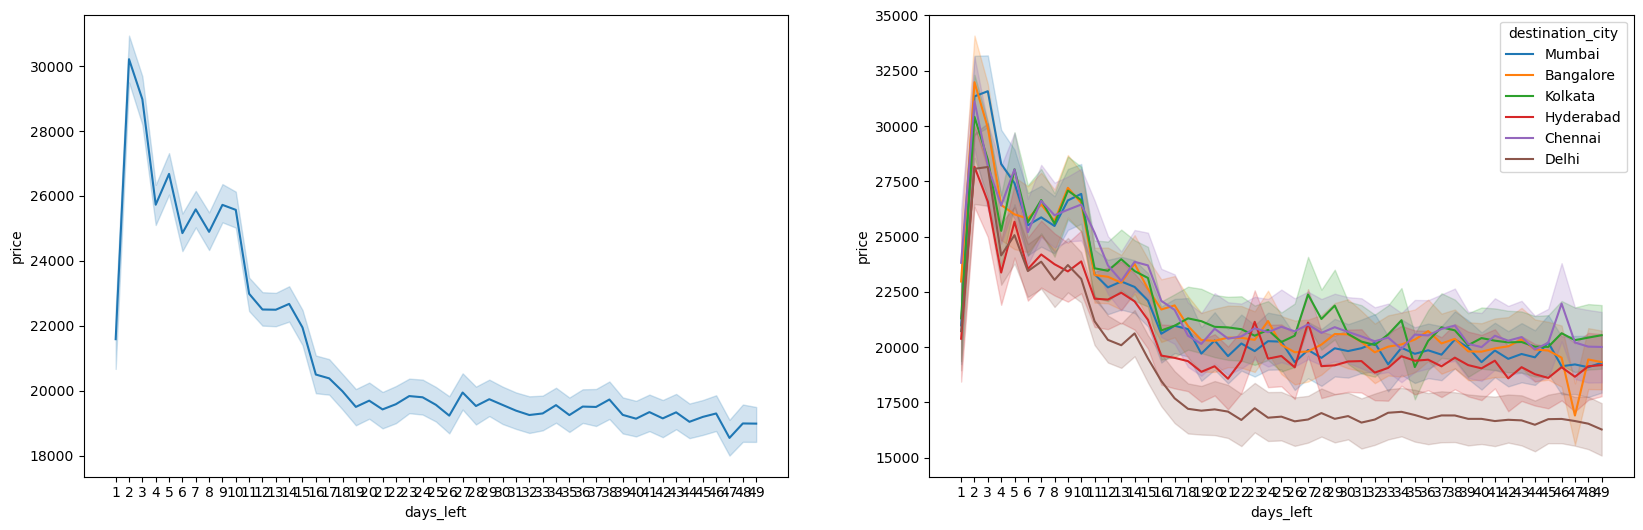

In [59]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

<AxesSubplot:xlabel='days_left', ylabel='price'>

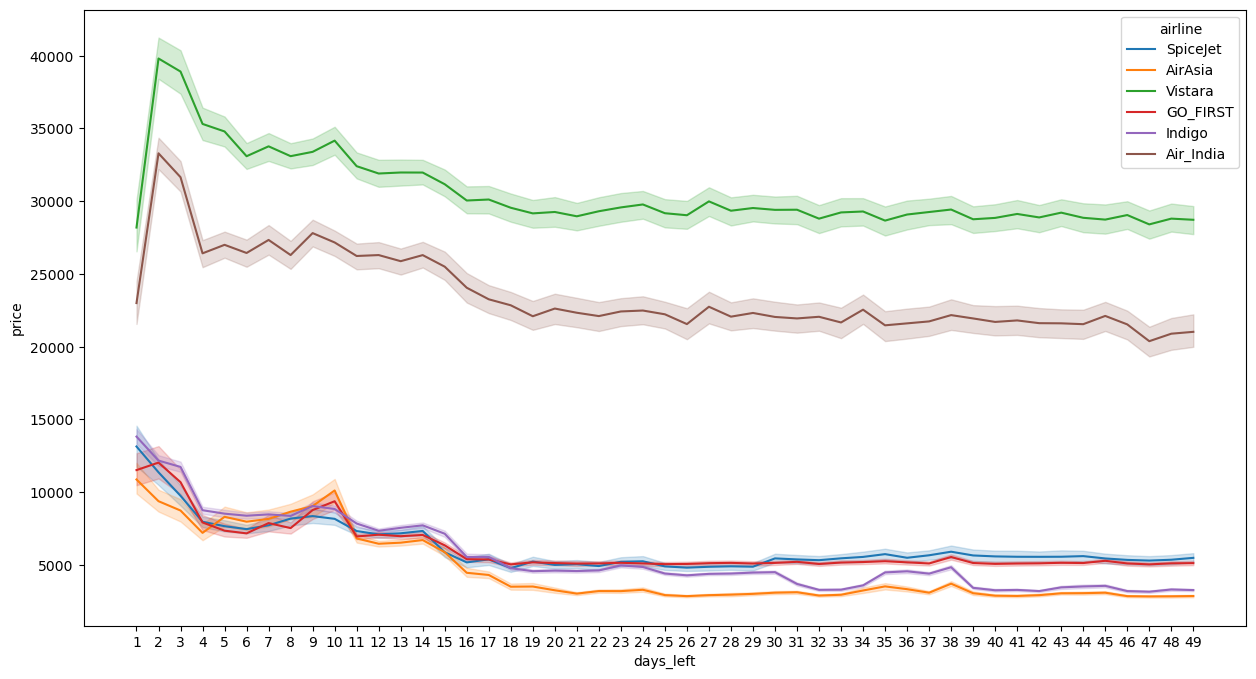

In [60]:
plt.figure(figsize=(15,8))
sns.lineplot(x='days_left',y='price',data=df,hue='airline')

In [61]:
# From the above graph we can clearly see that price is affected when tickets are bought in
# just 1 or 2 days before departure and there is increase in price.

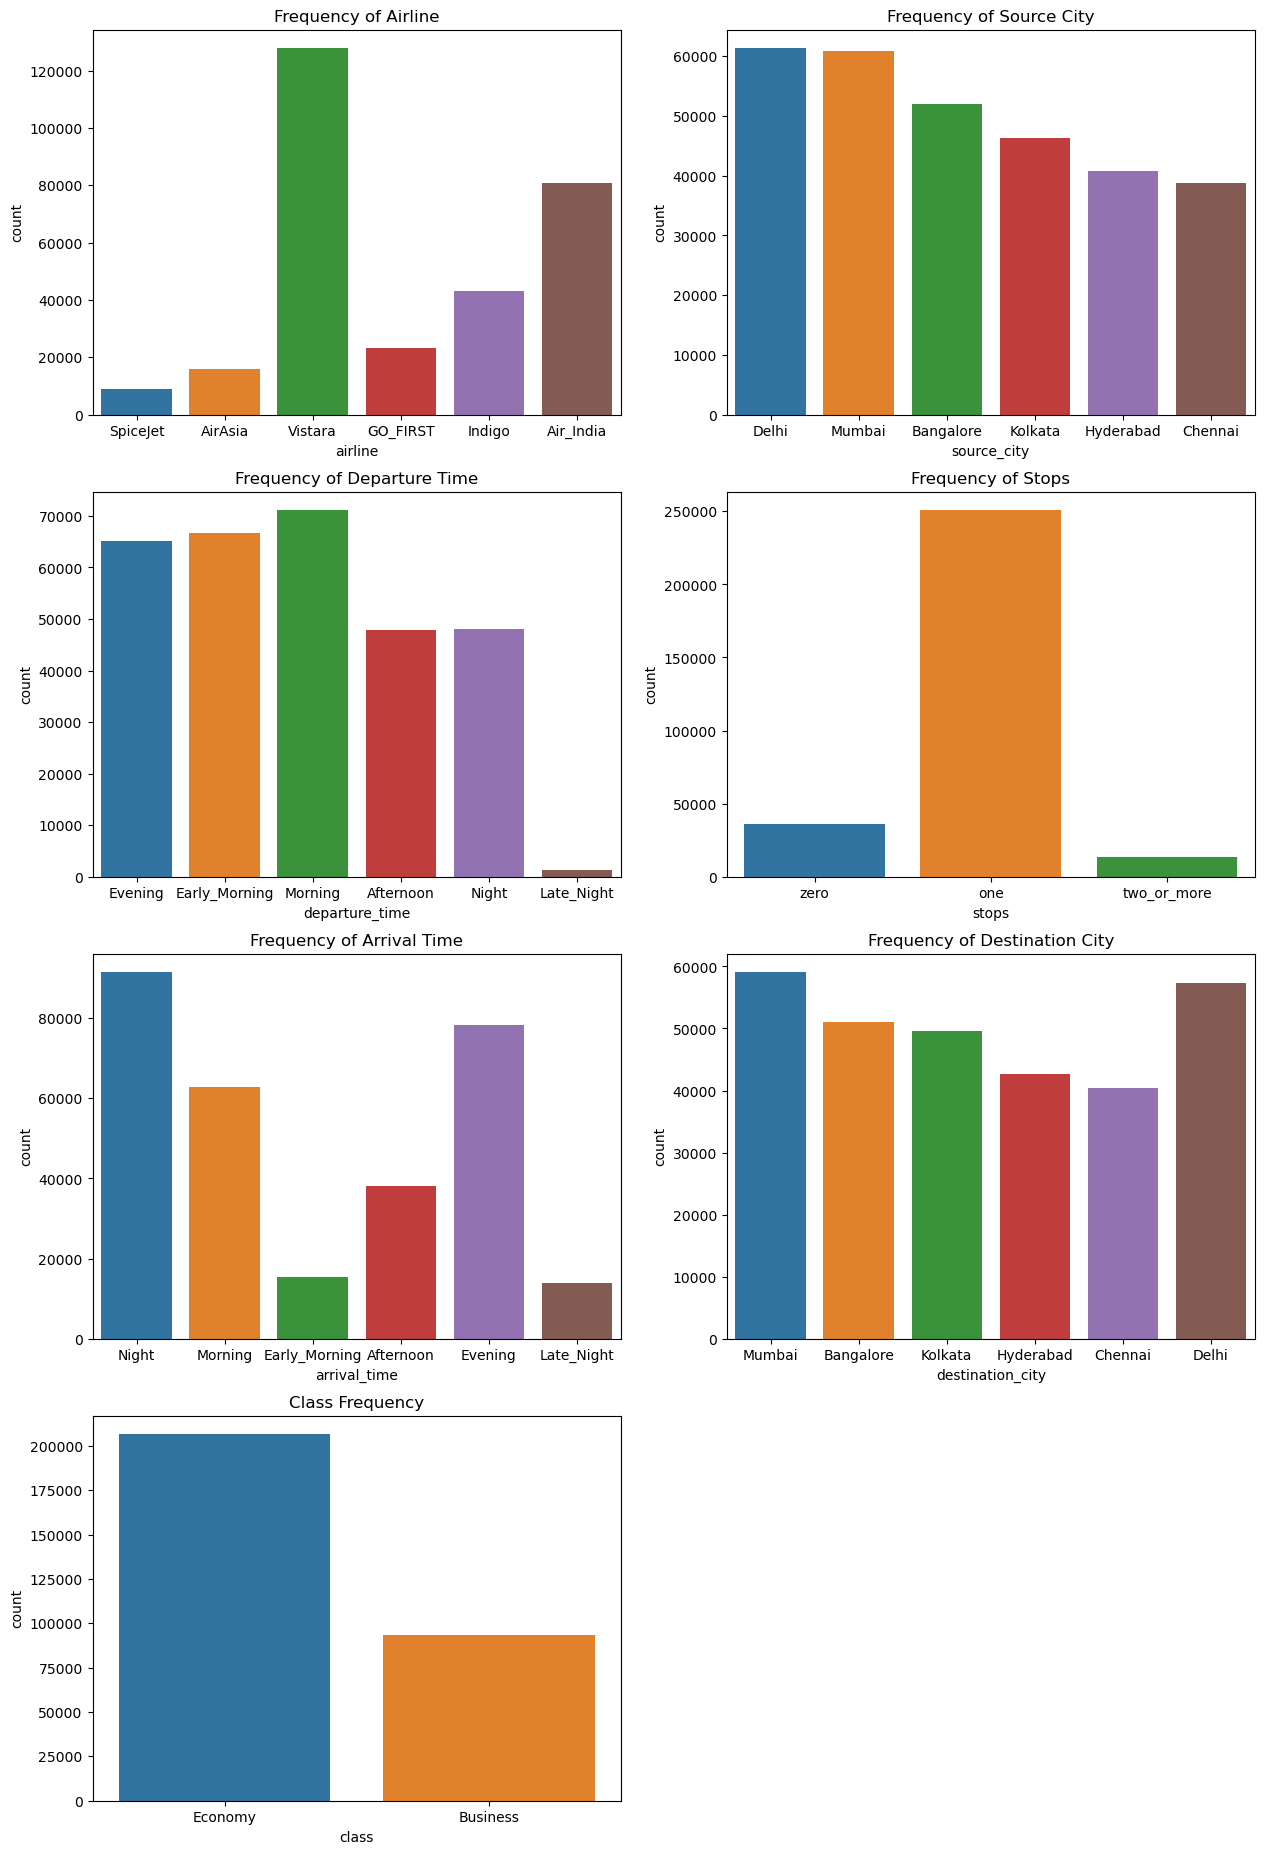

In [62]:
# Visualizations of categoric features with countplot
plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.show()

In [63]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [64]:
#8) Convert all the attributes into integer data type which are of object data type except Flight column.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df["stops"]=le.fit_transform(df["stops"])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  object 
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(1), object(2)
memory usage: 17.2+ MB


In [66]:
df=df.drop(columns=["flight"])

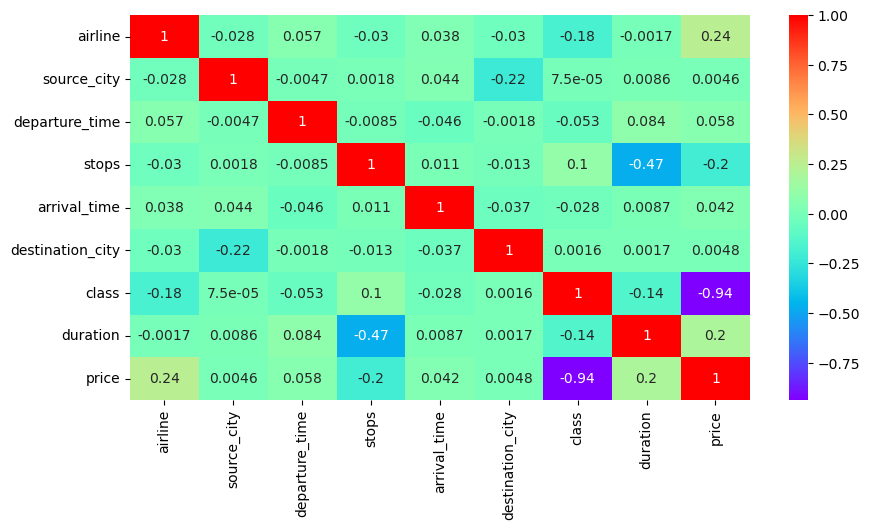

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
# vif_data["feature"] = X.columns 
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
#                           for i in range(len(X.columns))] 
# print(vif_data)

In [69]:
df=df.drop(columns=["stops"])

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

            feature  VIF values
0           airline    3.262826
1       source_city    2.818423
2    departure_time    2.708571
3      arrival_time    3.541809
4  destination_city    2.769347
5             class    2.654612
6          duration    3.370424


In [71]:
# class
df

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,5,5,1,2.17,1,5953
1,4,2,1,4,5,1,2.33,1,5953
2,0,2,1,1,5,1,2.17,1,5956
3,5,2,4,0,5,1,2.25,1,5955
4,5,2,4,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,2,3,0,10.08,49,69265
300149,5,1,0,5,3,0,10.42,49,77105
300150,5,1,1,5,3,0,13.83,49,79099
300151,5,1,1,2,3,0,10.00,49,81585


In [72]:
X = df.drop(columns=["price"])
y = df['price'] 
X

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left
0,4,2,2,5,5,1,2.17,1
1,4,2,1,4,5,1,2.33,1
2,0,2,1,1,5,1,2.17,1
3,5,2,4,0,5,1,2.25,1
4,5,2,4,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...
300148,5,1,4,2,3,0,10.08,49
300149,5,1,0,5,3,0,10.42,49
300150,5,1,1,5,3,0,13.83,49
300151,5,1,1,2,3,0,10.00,49


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr=LinearRegression()

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc=StandardScaler()

In [79]:
x_train

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left
148417,1,4,0,4,1,1,19.42,6
36879,3,2,0,5,1,1,7.00,13
274531,1,4,0,0,1,0,21.17,44
166397,5,3,5,1,0,1,10.25,11
272722,5,4,5,5,1,0,26.50,5
...,...,...,...,...,...,...,...,...
119879,5,4,2,0,2,1,20.50,2
259178,5,0,5,5,1,0,25.42,7
131932,1,4,5,4,5,1,13.67,29
146867,2,4,0,5,3,1,8.33,39


In [80]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [81]:
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred=lr.predict(x_test)

In [84]:
import numpy as np

In [85]:
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted_Value"])

In [86]:
difference

,Actual_Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [87]:
from sklearn import metrics

In [88]:
from sklearn.metrics import r2_score

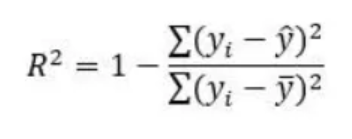

In [89]:
r2_score(y_test,y_pred) # how much the differences between the observed data and the fitted values. 

0.897752737512321

In [90]:
#The Mean absolute error represents the average of the absolute difference between 
#the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)

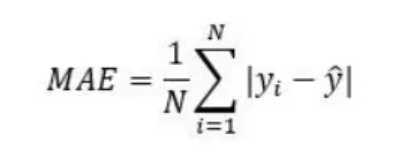

In [91]:
mean_abs_error

4468.426673542099

In [92]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.34765804610681533

In [93]:
#Mean Squared Error represents the average of the squared difference between 
#the original and predicted values in the data set. 
#It measures the variance of the residuals.

mean_sq_error=metrics.mean_squared_error(y_test,y_pred)

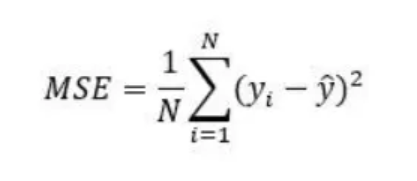

In [94]:
mean_sq_error

52706651.333342075

In [95]:
#Root Mean Squared Error is the square root of Mean Squared error. 
#It measures the standard deviation of residuals.

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

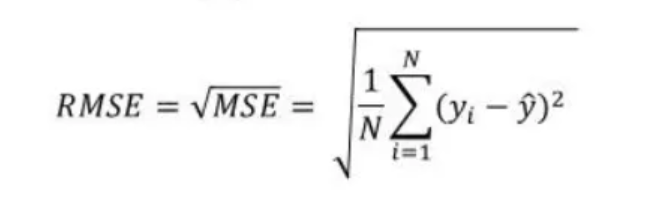

In [96]:
root_mean_sq_error

7259.934664536732

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


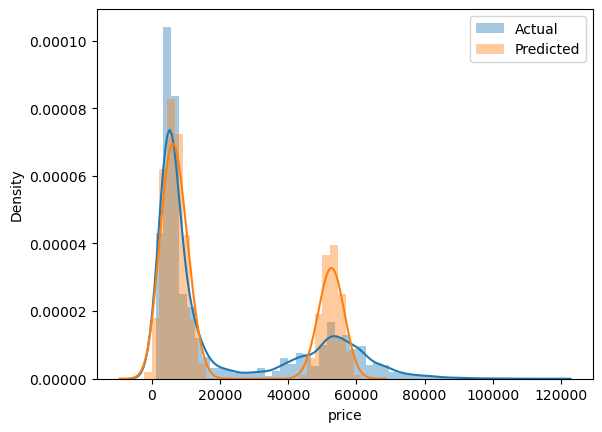

In [97]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

In [98]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)

0.9746951686985719

In [99]:
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1216.6825640085956

In [100]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.07741241986915708

In [101]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

13044191.971536929

In [102]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

3611.674399989142

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


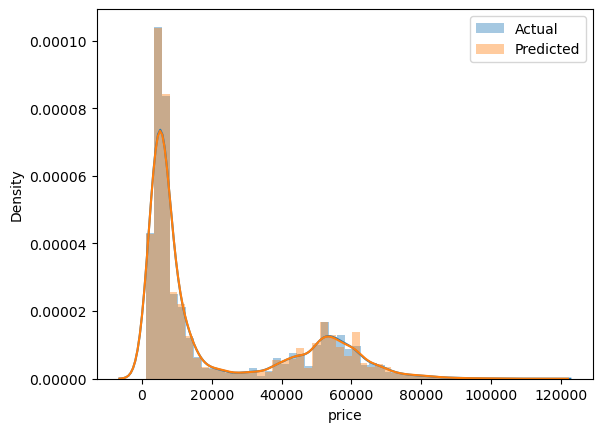

In [103]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

In [104]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)

0.9845542813912886

In [105]:
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1124.4078154096815

In [106]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.07343622744424935

In [107]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

7961994.145323575

In [108]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2821.7005768372333

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


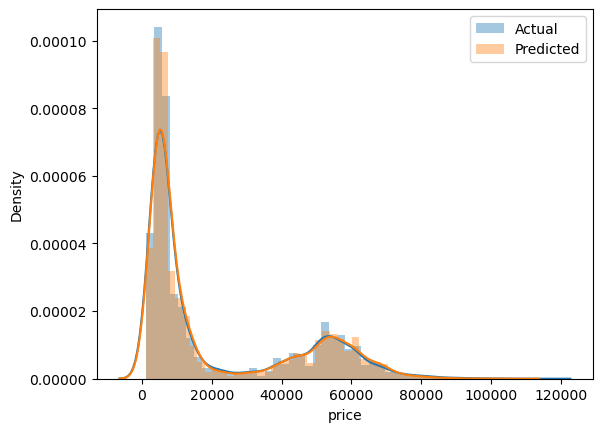

In [109]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()